In [1]:
from baseline_model import random_baseline_model 
import pandas as pd


In [2]:
model = random_baseline_model("train_data.csv", school_terms=True)

In [3]:
model.group["North"][0]

weekday  season  Term
Monday   Fall    0.0     84.0
                 1.0      NaN
                 2.0     81.0
         Spring  0.0     56.0
                 1.0     37.0
                         ... 
Sunday   Summer  1.0     36.0
                 2.0      NaN
         Winter  0.0     23.0
                 1.0      NaN
                 2.0     49.0
Name: North, Length: 84, dtype: float64

In [4]:
# print(model.group["North"][10]["Friday"]["Summer"])
model.predict_one(pd.DatetimeIndex(["2023-07-07 10:00:00"]),"North")


254.0

In [5]:
test_data = pd.read_csv("test_data.csv",usecols=[0], index_col=[0])
model.predict_many("test_data.csv",  ["North", "West"])# 

,North,West
Timestamp,,
2023-01-20 14:00:00,331.0,480.0
2023-01-20 15:00:00,285.0,429.0
2023-01-20 16:00:00,220.0,331.0
2023-01-20 17:00:00,141.0,227.0
2023-01-20 18:00:00,92.0,178.0
...,...,...
2024-03-05 19:00:00,122.0,174.0
2024-03-05 20:00:00,92.0,129.0
2024-03-05 21:00:00,63.0,103.0


In [6]:
ground_truth = pd.read_csv("test_data.csv", index_col=[0], usecols=["Timestamp", "West"])
prediction  = pd.read_csv("predict_many_output.csv", index_col=[0], usecols=["Timestamp", "West"])

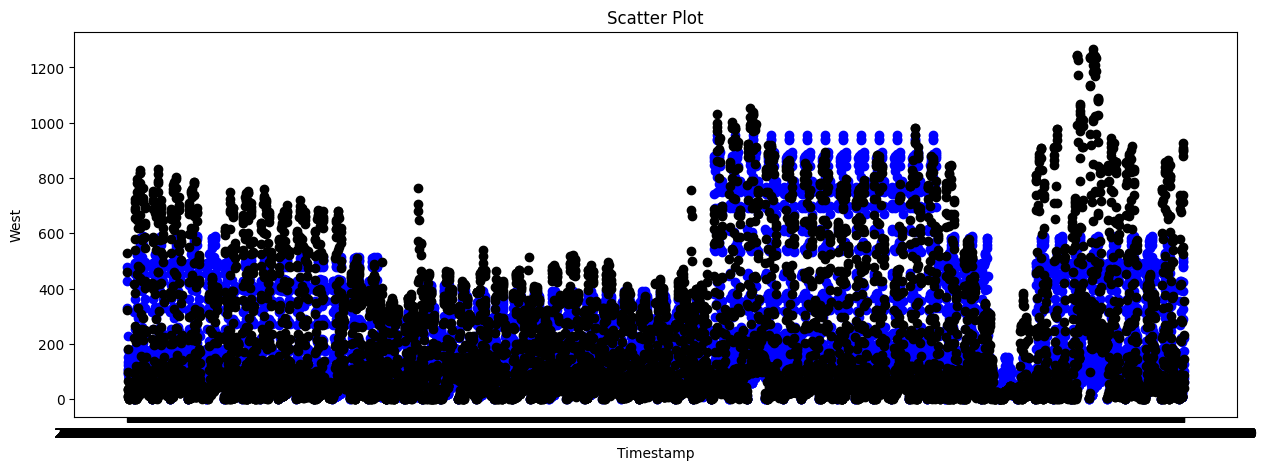

In [7]:
import matplotlib.pyplot as plt

# Assuming 'column1' is the index and 'column2' is another column
plt.figure(figsize=(15,5))
plt.scatter(prediction.index, prediction['West'], color="blue")
plt.scatter(ground_truth.index, ground_truth['West'], color="black" )
# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('West')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [10]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
epsilon = 0.00000001
r2 = r2_score(ground_truth['West'], prediction['West'])
mae = mean_absolute_error(ground_truth['West'], prediction['West'])
mse = mean_squared_error(ground_truth['West'], prediction['West'])
rmse = root_mean_squared_error(ground_truth['West'], prediction['West'])


print(f"r2 = {r2}")
print(f"mae = {mae}")
print(f"mse = {mse}")
print(f"rmse = {rmse}")


'''
For North parkade

With school terms
r2 = 0.8049944943832
mae = 52.12629441624365
mse = 5980.27269035533
rmse = 77.33222284633574

Without school terms
r2 = 0.76187702643071
mae = 56.50071065989848
mse = 7302.564670050761
rmse = 85.45504473143035


'''

r2 = 0.7709920907103522
mae = 69.00548223350253
mse = 12037.102131979695
rmse = 109.71372809261243


'\nFor North parkade\n\nWith school terms\nr2 = 0.8049944943832\nmae = 52.12629441624365\nmse = 5980.27269035533\nrmse = 77.33222284633574\n\nWithout school terms\nr2 = 0.76187702643071\nmae = 56.50071065989848\nmse = 7302.564670050761\nrmse = 85.45504473143035\n\n\n'